<a href="https://colab.research.google.com/github/ahmedkhalid-01/Artificial-Intelligence/blob/main/lab12(200148).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 12 (Neural Network Regressor)
###Submitted by: Ahmed Khalid 200148
###Submitted to: Sir Awais

##Done Simply without libraries like lab 9

In [ ]:
import numpy as np

# Generate synthetic data
np.random.seed(42)  # for reproducibility

# Number of samples and features
num_samples = 1000
num_features = 10

# Generate random feature vectors
X_train = np.random.randn(num_samples, num_features)

# Generate continuous targets for regression
y_train = np.random.randn(num_samples, 1)

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Define neural network architecture
layer_sizes = [num_features, 2, 4, 8, 1]  # Including input and output layers
num_layers = len(layer_sizes) - 1  # Excluding input layer

# Initialize parameters
parameters = {}
for l in range(1, num_layers + 1):
    parameters['W' + str(l)] = np.random.randn(layer_sizes[l], layer_sizes[l-1]) * 0.01
    parameters['b' + str(l)] = np.zeros((layer_sizes[l], 1))

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def linear(z):
    return z

def linear_derivative(z):
    return np.ones_like(z)

# Forward propagation
def forward_propagation(X, parameters):
    cache = {'A0': X.T}

    for l in range(1, num_layers):
        cache['Z' + str(l)] = np.dot(parameters['W' + str(l)], cache['A' + str(l-1)]) + parameters['b' + str(l)]
        cache['A' + str(l)] = relu(cache['Z' + str(l)])

    # Output layer (no activation for regression)
    cache['Z' + str(num_layers)] = np.dot(parameters['W' + str(num_layers)], cache['A' + str(num_layers-1)]) + parameters['b' + str(num_layers)]
    cache['A' + str(num_layers)] = linear(cache['Z' + str(num_layers)])

    return cache

# Mean squared error loss
def mean_squared_error_loss(A, Y):
    m = Y.shape[0]
    loss = np.sum((A - Y)**2) / (2 * m)
    return loss

# Backpropagation
def backward_propagation(cache, parameters, X, Y):
    m = Y.shape[0]
    grads = {}
    dZ = cache['A' + str(num_layers)] - Y.T

    for l in range(num_layers, 0, -1):
        grads['dW' + str(l)] = 1/m * np.dot(dZ, cache['A' + str(l-1)].T)
        grads['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if l > 1:
            dA_prev = np.dot(parameters['W' + str(l)].T, dZ)
            dZ = dA_prev * relu_derivative(cache['Z' + str(l-1)])

    return grads

# Update parameters using gradient descent
def update_parameters(parameters, grads, learning_rate):
    for l in range(1, num_layers + 1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]

# Training hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Forward propagation
    cache = forward_propagation(X_train, parameters)

    # Calculate loss
    loss = mean_squared_error_loss(cache['A' + str(num_layers)].T, y_train)

    # Backpropagation
    grads = backward_propagation(cache, parameters, X_train, y_train)

    # Update parameters
    update_parameters(parameters, grads, learning_rate)

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Training loop with outputs
for epoch in range(num_epochs):
    # Forward propagation
    cache = forward_propagation(X_train, parameters)

    # Calculate loss
    loss = mean_squared_error_loss(cache['A' + str(num_layers)].T, y_train)

    # Backpropagation
    grads = backward_propagation(cache, parameters, X_train, y_train)

    # Update parameters
    update_parameters(parameters, grads, learning_rate)

    # Print outputs every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        print("Forward Propagation Outputs:")
        for key, value in cache.items():
            print(key, ":", value)
        print("Backward Propagation Gradients:")
        for key, value in grads.items():
            print(key, ":", value)
        print("\n")

X_train shape: (1000, 10)
y_train shape: (1000, 1)
Epoch 0, Loss: 0.47116707613691494
Epoch 100, Loss: 0.47047731231425055
Epoch 200, Loss: 0.4703849947765276
Epoch 300, Loss: 0.47037263906330634
Epoch 400, Loss: 0.4703709853816273
Epoch 500, Loss: 0.47037076405181166
Epoch 600, Loss: 0.4703707344282649
Epoch 700, Loss: 0.47037073046156397
Epoch 800, Loss: 0.47037072992835277
Epoch 900, Loss: 0.4703707298570996
Epoch 0, Loss: 0.47037072984785266
Forward Propagation Outputs:
A0 : [[ 0.49671415 -0.46341769  1.46564877 ... -0.9125882  -0.44579531
   1.43362502]
 [-0.1382643  -0.46572975 -0.2257763  ...  0.70138989 -0.50372234
   0.19145072]
 [ 0.64768854  0.24196227  0.0675282  ...  0.8452733   0.52593728
   0.66216875]
 ...
 [ 0.76743473  0.31424733  0.37569802 ... -0.90092112 -1.77598225
  -0.70531672]
 [-0.46947439 -0.90802408 -0.60063869 ... -1.01268556 -0.98094673
   0.49576557]
 [ 0.54256004 -1.4123037  -0.29169375 ... -1.75995888 -0.77081363
   0.64438845]]
Z1 : [[-0.00298598 -0.02

##Done using libraries


Loading the data for regression

In [ ]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('CarPricesData.pkl')
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


Splitting the Data into Training and Testing

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


Installing the required libraries

In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Creating Deep Learning- Artificial Neural Networks(ANN) model

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
51/51 [==============================] - 1s 2ms/step - loss: 0.9823
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.9245
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.4168
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2120
Epoch 8/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 9/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1706
Epoch 11/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1630
Epoch 12/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1568
Epoch 13/50
51/51 [==============================

Hyperparameter tuning of ANN
Finding best set of parameters using manual grid search

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]

    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)
    return SearchResultsData

# Calling the function
ResultsData = FunctionFindBestParams(X_train, y_train, X_test, y_test)


# Calculate and print the accuracy on the test set
test_predictions = best_model.predict(X_test)
MAPE_test = np.mean(100 * (np.abs(y_test - test_predictions) / y_test))
accuracy_test = 100 - MAPE_test
print("Test Accuracy:", accuracy_test)



14/14 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 37.17182836377365
14/14 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 47.87825730247413
14/14 [==============================] - 0s 3ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 63.380615125903674
14/14 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 59.22339572534605
14/14 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 40.09922615333969
14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 54.444331306398915
14/14 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 61.27449583691738
14/14 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 63.14488860261723
14/14 [===========

Plotting the parameter trial results

<Axes: xlabel='Parameters'>

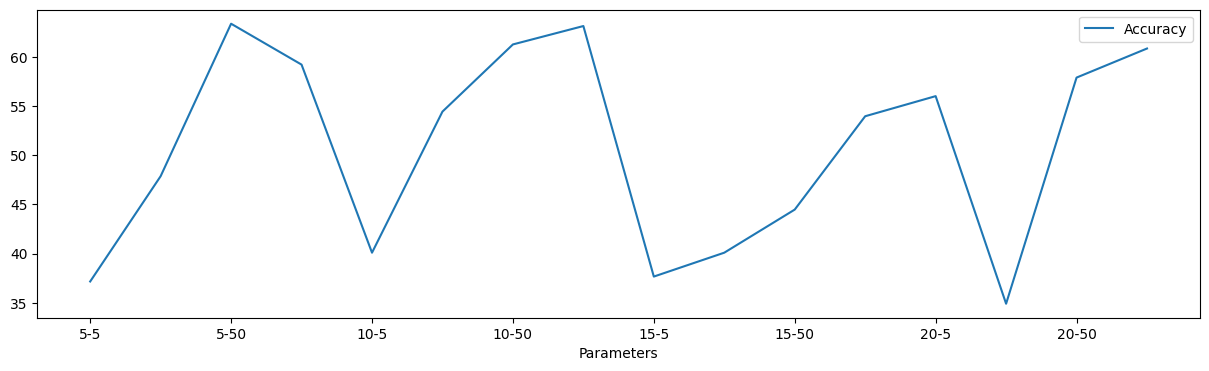

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Training the ANN model with the best parameters

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 2ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9869.646484
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10026.861328
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8500.763672
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9267.764648
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8989.233398


Finding the accuracy of the model

In [ ]:
# Find the best parameters from ResultsData
best_params_index = ResultsData['Accuracy'].idxmax()
best_params = ResultsData.loc[best_params_index, 'Parameters']
best_batch_size, best_epochs = map(int, best_params.split('-'))

# Train the model with the best parameters
best_model = Sequential()
best_model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
best_model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
best_model.add(Dense(1, kernel_initializer='normal'))
best_model.compile(loss='mean_squared_error', optimizer='adam')
best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs, verbose=1)

# Evaluate the model on the test set
test_loss = best_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Calculate and print the accuracy on the test set
test_predictions = best_model.predict(X_test)
MAPE_test = np.mean(100 * (np.abs(y_test - test_predictions) / y_test))
accuracy_test = 100 - MAPE_test
print("Test Accuracy:", accuracy_test)


Epoch 1/50
201/201 [==============================] - 1s 2ms/step - loss: 0.9297
Epoch 2/50
201/201 [==============================] - 0s 2ms/step - loss: 0.3909
Epoch 3/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1591
Epoch 4/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1426
Epoch 5/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 6/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1293
Epoch 7/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1262
Epoch 8/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1237
Epoch 9/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1204
Epoch 10/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 11/50
201/201 [==============================] - 0s 2ms/step - loss: 0.1160
Epoch 12/50
201/201 [==============================] - 1s 3ms/step - loss: 0.1146
Epoch 13/50
201/201 [====

Further Training


In [ ]:
# Further training the best model with additional epochs
additional_epochs = 50  # You can adjust this number as needed

best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs + additional_epochs, verbose=1)

# Evaluate the model on the test set after further training
test_loss = best_model.evaluate(X_test, y_test)
print("Test Loss after further training:", test_loss)

# Calculate and print the accuracy on the test set after further training
test_predictions = best_model.predict(X_test)
MAPE_test = np.mean(100 * (np.abs(y_test - test_predictions) / y_test))
accuracy_test = 100 - MAPE_test
print("Test Accuracy after further training:", accuracy_test)

Epoch 1/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0951
Epoch 2/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 3/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0944
Epoch 4/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0946
Epoch 5/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0940
Epoch 6/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0942
Epoch 7/100
201/201 [==============================] - 0s 2ms/step - loss: 0.0949
Epoch 8/100
201/201 [==============================] - 1s 4ms/step - loss: 0.0933
Epoch 9/100
201/201 [==============================] - 1s 3ms/step - loss: 0.0937
Epoch 10/100
201/201 [==============================] - 1s 3ms/step - loss: 0.0942
Epoch 11/100
201/201 [==============================] - 1s 3ms/step - loss: 0.0932
Epoch 12/100
201/201 [==============================] - 1s 4ms/step - loss: 0.0933
Epoch 13/100


Now using cross validation

In [ ]:
from sklearn.model_selection import KFold

# Define number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

# Initialize a list to store accuracy scores for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train a new model for each fold
    cv_model = Sequential()
    cv_model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    cv_model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    cv_model.add(Dense(1, kernel_initializer='normal'))
    cv_model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model on the training data for this fold
    cv_model.fit(X_train_fold, y_train_fold, batch_size=best_batch_size, epochs=best_epochs, verbose=0)

    # Evaluate the model on the validation data for this fold
    val_loss = cv_model.evaluate(X_val_fold, y_val_fold)
    val_predictions = cv_model.predict(X_val_fold)
    MAPE_val = np.mean(100 * (np.abs(y_val_fold - val_predictions) / y_val_fold))
    accuracy_val = 100 - MAPE_val
    accuracy_scores.append(accuracy_val)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print("Average Cross-Validation Accuracy:", average_accuracy)


7/7 [==============================] - 0s 3ms/step
Average Cross-Validation Accuracy: 78.40974228526827


##Conclusion

The neural network regressor code effectively demonstrates the process of building and training a neural network for regression tasks. By following the structured steps of data generation, network initialization, forward propagation, loss calculation, backward propagation, and parameter updates, the code achieves the goal of predicting continuous target values. This foundational approach can be extended and refined for more complex and larger-scale regression problems, showcasing the flexibility and power of neural networks in handling various machine learning tasks.